In [335]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
from batchflow import dataset, Pipeline, P, R
from batchflow.opensets import MNIST
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [550]:
%autoreload 2
from batch import MyBatch
dataset = MNIST(batch_class=MyBatch)

Extracting /tmp/train-images-idx3-ubyte.gzDownloading http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
Extracting /tmp/train-labels-idx1-ubyte.gz

Extracting /tmp/t10k-labels-idx1-ubyte.gz
Extracting /tmp/t10k-images-idx3-ubyte.gz


In [551]:
background = PIL.Image.fromarray(np.zeros((128,128)), mode='RGB')
augmentation = (Pipeline()
                 .rotate(angle=P(R('uniform', -35, 35)))
                 .scale(factor=P(R('uniform', 0.5, 1.5)), 
                        origin='random')
                 .pil_convert(mode='RGB')
                 .put_on_background(background, origin='random')
                 .mask()
                 .invert(channels=P(R('randint', 0, 3)), p=0.5)
                 .noise(n=15)
               )

In [552]:
pipeline = augmentation << dataset.test

In [639]:
batch = pipeline.next_batch(10, shuffle=True)

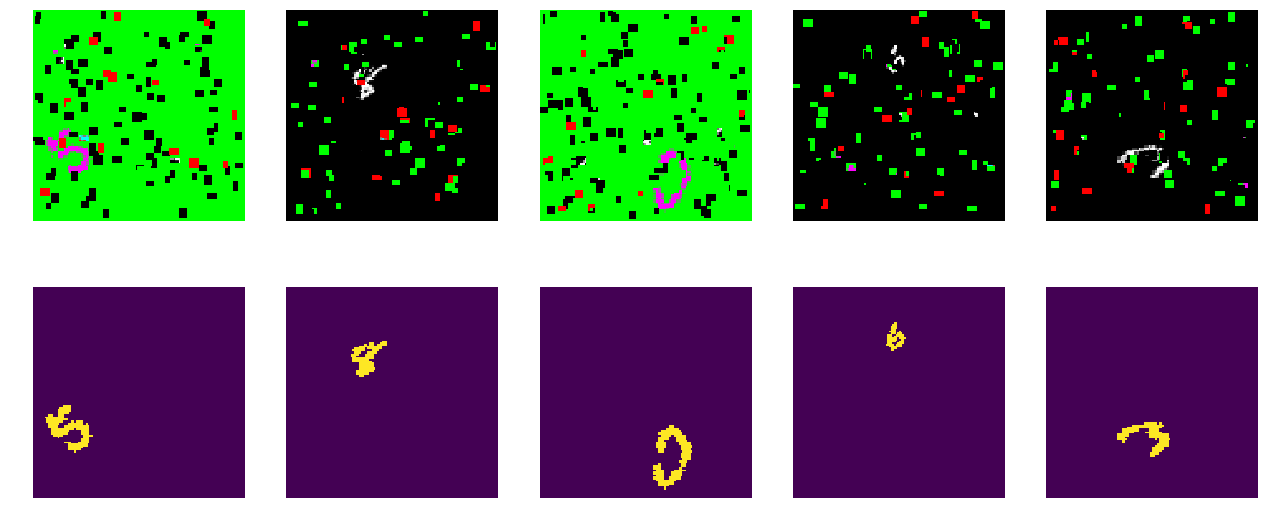

In [640]:
%autoreload 2
from utils import plot_augm_masks
plot_augm_masks(batch)